In [1]:
from carbon import CarbonPair, CarbonSimulatorUI, analytics as al
from carbon import __version__ as cversion, __date__ as cdate
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
print (f"Carbon Version v{cversion} ({cdate})")
print (f"Analytics Version v{al.__version__} ({al.__date__})")

Carbon Version v1.1 (19/Nov/2022)
Analytics Version v1.1 (23/Nov/2022)


# Carbon Simulation - Demo 3-2

In this demo we look at an **order book**

## Setup

In [2]:
Sim = CarbonSimulatorUI(pair=CarbonPair("ETH","USDC"), verbose=False, raiseonerror=True)
CA = al.Analytics(Sim, verbose=True)
CA

Analytics(sim=CarbonSimulatorUI(<0 orders, 0 trades>, pair='CarbonPair(tknb='ETH', tknq='USDC')'))

In [3]:
maxx = 3000
orders = tuple([
    al.orders_nt("ETH", 100, 2000, maxx),
    al.orders_nt("ETH", 100, 2400, 2500),
    al.orders_nt("ETH", 100, 2500, 2700),
    #al.orders_nt("ETH", 100, 2200, 2600),
    al.orders_nt("USDC", 1000*150, 1500, 500),
    al.orders_nt("USDC", 1100*150, 1200, 1000),
])

In [4]:
for o in orders:
    Sim.add_order(o.tkn, o.amt, o.p_start, o.p_end)
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,2000.0,3000.0,2000.0,USDC per ETH,0
1,1,ETHUSDC,ETH,100.0,100.0,ETH,2400.0,2500.0,2400.0,USDC per ETH,1
2,2,ETHUSDC,ETH,100.0,100.0,ETH,2500.0,2700.0,2500.0,USDC per ETH,2
3,3,ETHUSDC,USDC,150000.0,150000.0,USDC,1500.0,500.0,1500.0,USDC per ETH,3
4,4,ETHUSDC,USDC,165000.0,165000.0,USDC,1200.0,1000.0,1200.0,USDC per ETH,4


In [5]:
Sim.liquidity(Sim.ASDF)

y
pair    tkn           
ETHUSDC ETH      300.0
        USDC  315000.0

## AMM sells base token (ask side)

In [6]:
max_liquidity_eth = Sim.liquidity()["ETHUSDC"]["ETH"]
print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["ETH"]} ETH')
print("max liquidity", max_liquidity_eth)
src_amounts_eth = al.linspace(max_liquidity_eth*1.1, 20)

sim liquidity 300.0 ETH
max liquidity 300.0


In [7]:
CA.simulate_trades(60, CA.ASK)

[simulate_trades] trading src=60 trg=134140.495817 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]


134140.495817

In [8]:
CA.simulate_trades(70, CA.ASK)

[simulate_trades] trading src=70 trg=158295.64718 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]


158295.64718

In [9]:
trg_amounts = al.vec([
    CA.simulate_trades(size, CA.ASK) for size in src_amounts_eth
])

[simulate_trades] trading src=0.0001 trg=0.2 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=16.5 trg=34030.373842 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=33.0 trg=70254.330235 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=49.5 trg=108873.077333 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=66.0 trg=148622.907254 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=82.5 trg=188615.116932 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=99.0 trg=228851.930059 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=115.5 trg=269335.597612 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=132.0 trg=310068.398274 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=148.5 trg=351052.63886 [pair=ETHUSDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=165.0 trg=392309.053961 [pair=ETHUSDC, tknb=ETH 

In [10]:
OB = al.OrderBook(src_amounts_eth, trg_amounts, "ETH", "USDC")
print(OB.explain())

This is the ASK book.
Source token = ETH, target token = USDC.
AMM sells ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in ETH.


'plotted tokens received against trade size (740,765)'

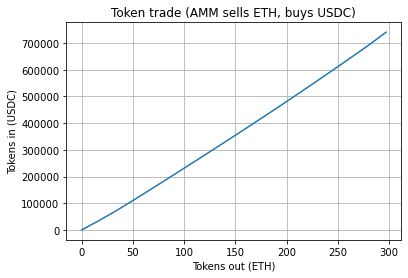

In [11]:
OB.plot_token_amount_chart()

When SELLING ETH, the AMM sells more and more expensively the more ETH it sells

'plotted marginal and effective prices against trade size'

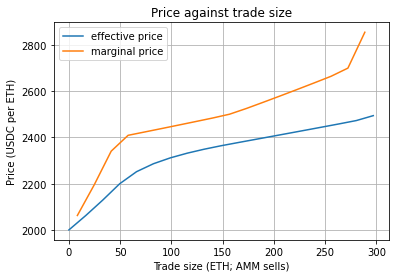

In [12]:
OB.plot_price_chart()

When SELLING ETH, the AMM pays more (in ETH terms) for the first units of USD received than for the later ones

'plotted order book (700,198)'

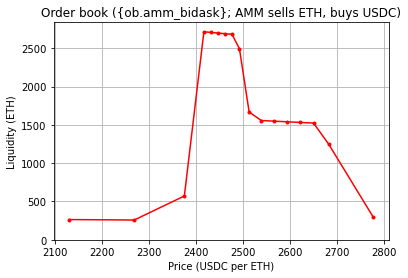

In [13]:
OB.plot_orderbook_chart()

## AMM sells base token (bid side)

In [14]:
max_liquidity_usdc = Sim.liquidity()["ETHUSDC"]["USDC"]
print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["USDC"]} USDC')
print("max liquidity", max_liquidity_usdc)
src_amounts_eth2 = al.linspace(max_liquidity_usdc/1000*1.1, 20)

sim liquidity 315000.0 USDC
max liquidity 315000.0


In [15]:
trg_amounts = al.vec([
    CA.simulate_trades(size, CA.BID) for size in src_amounts_eth2
])

[simulate_trades] trading src=0.0001 trg=0.15 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=17.325 trg=24214.421598 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=34.65 trg=45506.29547 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=51.974999999999994 trg=65953.864192 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=69.3 trg=86025.371164 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=86.625 trg=105731.096372 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=103.94999999999999 trg=125080.948499 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=121.27499999999999 trg=144084.481545 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=138.6 trg=162750.910551 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=155.92499999999998 trg=181089.1265 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=17

ERROR:root:[match] imprecise matching: err=0.06999918489097334 (goal=346.496535, actual=323.8287840708084, is_by_target=False) 


[match] imprecise matching: err=0.016509390740331975 (goal=329.175, actual=323.8287840708084, is_by_target=False) 
[simulate_trades] trading src=329.175 trg=315000.0 [pair=ETHUSDC, tknb=ETH amm_buys_tknb]
[match] imprecise matching: err=0.06999918489097334 (goal=346.496535, actual=323.8287840708084, is_by_target=False) 
[simulate_trades] trading src=346.496535 trg=None [pair=ETHUSDC, tknb=ETH amm_buys_tknb]


In [16]:
OB2 = al.OrderBook(src_amounts_eth2, trg_amounts, "ETH", "USDC", bidask=al.OrderBook.BID)
print(OB2.explain())

This is the BID book.
Source token = ETH, target token = USDC.
AMM buys ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in ETH.


'plotted tokens received against trade size (315,000)'

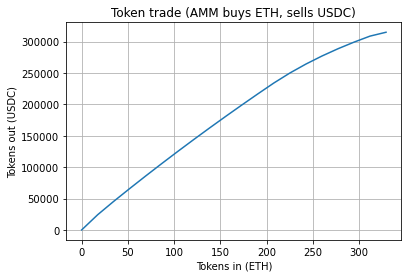

In [17]:
OB2.plot_token_amount_chart()

'plotted marginal and effective prices against trade size'

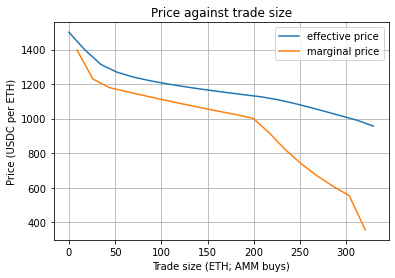

In [18]:
OB2.plot_price_chart()

'plotted order book (299,807)'

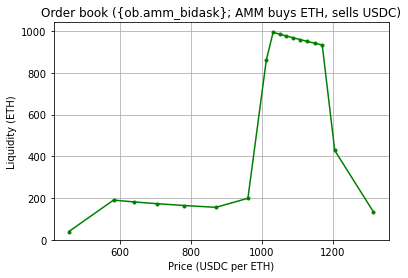

In [19]:
OB2.plot_orderbook_chart()

## Combined

'plotted order book (700,198)'

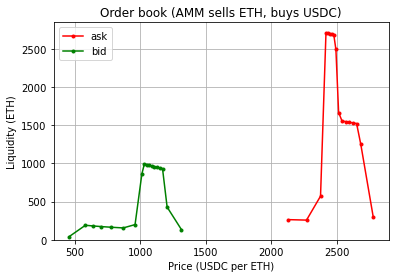

In [20]:
OB.plot_orderbook_chart(otherob=OB2)